In [2]:
from scipy.io import loadmat
import numpy as np

# بارگذاری داده‌های کلاس سالم و کلاس عیب از فایل‌های مربوطه
normal_data = loadmat('/content/97.mat')['X097_DE_time']  # داده‌های کلاس سالم
ir_data = loadmat('/content/IR007.mat')['X105_DE_time']  # داده‌های کلاس عیب

# تنظیمات مورد نیاز برای ایجاد دیتاست
M = 100  # تعداد نمونه‌ها از هر کلاس
N = 200  # طول هر نمونه

# اطمینان از کافی بودن داده برای برداشت نمونه‌ها
assert normal_data.shape[0] >= M * N, "Not enough data in NORMAL_0"
assert ir_data.shape[0] >= M * N, "Not enough data in IR007_x"

# ایجاد دو ماتریس جداگانه برای داده‌های هر کلاس
normal_dataset = np.zeros((M, N))
ir_dataset = np.zeros((M, N))

# استخراج نمونه‌ها برای هر کلاس
for i in range(M):
    start_index = np.random.randint(0, normal_data.shape[0] - N + 1)
    normal_dataset[i, :] = normal_data[start_index:start_index + N].flatten()  # نمونه‌های کلاس NORMAL_0

    start_index = np.random.randint(0, ir_data.shape[0] - N + 1)
    ir_dataset[i, :] = ir_data[start_index:start_index + N].flatten()  # نمونه‌های کلاس IR007_x

# چاپ اندازه‌های دیتاست‌ها
print("Normal dataset shape:", normal_dataset.shape)
print("IR dataset shape:", ir_dataset.shape)


Normal dataset shape: (100, 200)
IR dataset shape: (100, 200)


In [3]:
import numpy as np

def calculate_features(data):
    # انحراف معیار
    std_dev = np.std(data, axis=1)
    # بیشینه
    peak = np.max(data, axis=1)
    # کجی
    skewness = np.sum((data - np.mean(data, axis=1, keepdims=True))**3, axis=1) / (std_dev**3 * data.shape[1])
    # کرتوزیس
    kurtosis = np.sum((data - np.mean(data, axis=1, keepdims=True))**4, axis=1) / (std_dev**4 * data.shape[1])
    # عامل شکل
    rms = np.sqrt(np.mean(data**2, axis=1))
    shape_factor = rms / np.mean(np.abs(data), axis=1)
    # عامل تأثیر
    impact_factor = peak / np.mean(np.abs(data), axis=1)
    # میانگین مطلق
    absolute_mean = np.mean(np.abs(data), axis=1)
    # بیشترین میزان تغییرات
    peak_to_peak = np.ptp(data, axis=1)

    # ترکیب تمام ویژگی‌ها در یک ماتریس
    features = np.column_stack((std_dev, peak, skewness, kurtosis, shape_factor, impact_factor, absolute_mean, peak_to_peak))
    return features

# استخراج ویژگی‌ها برای دیتاست‌های سالم و عیب
normal_features = calculate_features(normal_dataset)
ir_features = calculate_features(ir_dataset)

# نام‌های ویژگی‌ها
feature_names = ["Standard Deviation", "Peak", "Skewness", "Kurtosis", "Shape Factor", "Impact Factor", "Absolute Mean", "Peak to Peak"]

# چاپ مقادیر ویژگی‌ها برای چند نمونه اول
print("Features for Normal Dataset:")
for i in range(min(5, normal_features.shape[0])):  # چاپ 5 نمونه اول یا کمتر
    print(f"Sample {i+1}:")
    for j, name in enumerate(feature_names):
        print(f"  {name}: {normal_features[i, j]:.4f}")

print("\nFeatures for IR Dataset:")
for i in range(min(5, ir_features.shape[0])):
    print(f"Sample {i+1}:")
    for j, name in enumerate(feature_names):
        print(f"  {name}: {ir_features[i, j]:.4f}")


Features for Normal Dataset:
Sample 1:
  Standard Deviation: 0.0585
  Peak: 0.2040
  Skewness: 0.1750
  Kurtosis: 3.8612
  Shape Factor: 1.3395
  Impact Factor: 4.4813
  Absolute Mean: 0.0455
  Peak to Peak: 0.3365
Sample 2:
  Standard Deviation: 0.0864
  Peak: 0.2067
  Skewness: -0.0996
  Kurtosis: 2.2917
  Shape Factor: 1.1986
  Impact Factor: 2.8381
  Absolute Mean: 0.0728
  Peak to Peak: 0.4049
Sample 3:
  Standard Deviation: 0.0878
  Peak: 0.2336
  Skewness: 0.2563
  Kurtosis: 2.3501
  Shape Factor: 1.2199
  Impact Factor: 3.2167
  Absolute Mean: 0.0726
  Peak to Peak: 0.3893
Sample 4:
  Standard Deviation: 0.0518
  Peak: 0.1283
  Skewness: 0.1047
  Kurtosis: 2.7805
  Shape Factor: 1.2422
  Impact Factor: 3.0769
  Absolute Mean: 0.0417
  Peak to Peak: 0.2562
Sample 5:
  Standard Deviation: 0.0750
  Peak: 0.1850
  Skewness: -0.1464
  Kurtosis: 2.6236
  Shape Factor: 1.2337
  Impact Factor: 2.9588
  Absolute Mean: 0.0625
  Peak to Peak: 0.3532

Features for IR Dataset:
Sample 1:
  S

In [4]:
import numpy as np
from sklearn.utils import shuffle

# ترکیب داده‌ها و برچسب‌ها از هر دو کلاس
features = np.vstack((normal_features, ir_features))
labels = np.concatenate((np.zeros(normal_features.shape[0]), np.ones(ir_features.shape[0])))

# مخلوط کردن داده‌ها
features, labels = shuffle(features, labels, random_state=42)

# تعیین نسبت تقسیم داده‌ها به آموزش و ارزیابی
train_ratio = 0.75
n_train = int(len(features) * train_ratio)

# تقسیم داده‌ها به بخش‌های آموزشی و ارزیابی
X_train, X_test = features[:n_train], features[n_train:]
y_train, y_test = labels[:n_train], labels[n_train:]

# چاپ ابعاد دیتاست‌های آموزشی و ارزیابی
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (150, 8)
Training labels shape: (150,)
Test data shape: (50, 8)
Test labels shape: (50,)


In [5]:
from sklearn.preprocessing import StandardScaler

# ایجاد استاندارد اسکیلر
scaler = StandardScaler()

# نرمال‌سازی داده‌های آموزشی
X_train_normalized = scaler.fit_transform(X_train)

# نرمال‌سازی داده‌های ارزیابی
X_test_normalized = scaler.transform(X_test)

# چاپ شکل داده‌های نرمال‌سازی شده
print("Normalized Training data shape:", X_train_normalized.shape)
print("Normalized Test data shape:", X_test_normalized.shape)


Normalized Training data shape: (150, 8)
Normalized Test data shape: (50, 8)


Accuracy on test data: 1.0
F1-score on test data: 1.0


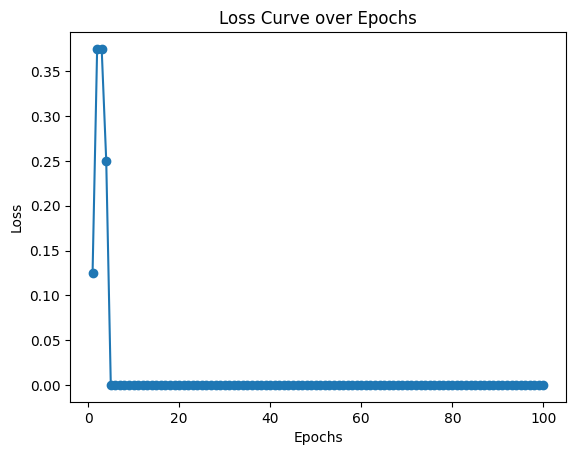

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            loss = 0
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                loss += (y[idx] - y_predicted) ** 2
            self.losses.append(loss / n_samples)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

# تولید داده‌های مصنوعی برای نمونه
X = np.array([[2, 3], [1, 2], [3, 2], [0.5, 0.5], [1, 1], [2, 1], [1, 0.5], [2, 0.5], [1.5, 2.5], [1.5, 0.5]])
y = np.array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

# تقسیم داده‌ها به آموزشی و تست
X_train, X_test = X[:8], X[8:]
y_train, y_test = y[:8], y[8:]

# آموزش مدل
p = Perceptron(learning_rate=0.01, n_iter=100)
p.fit(X_train, y_train)

# ارزیابی مدل
y_pred = p.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy on test data:", accuracy)
print("F1-score on test data:", f1)

# رسم نمودار تابع اتلاف
plt.plot(range(1, len(p.losses) + 1), p.losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve over Epochs')
plt.show()
